In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline

In [3]:
from scipy.stats import zscore 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [4]:
#read the data 
loandata=pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [4]:
loandata.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                   5000 non-null int64
Age                  5000 non-null int64
Experience           5000 non-null int64
Income               5000 non-null int64
ZIPCode              5000 non-null int64
Family               5000 non-null int64
CCAvg                5000 non-null float64
Education            5000 non-null int64
Mortgage             5000 non-null int64
PersonalLoan         5000 non-null int64
SecuritiesAccount    5000 non-null int64
CDAccount            5000 non-null int64
Online               5000 non-null int64
CreditCard           5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
#the above data indicates thart there in no null value, hence we can proceed with our data 

In [7]:
loandata.shape

(5000, 14)

In [5]:
#studying each attribute 

#The first variable ID doesnt hold any significane in our analysis, so it can be dropped.

#PersonalLoan is the target variable as we are trying to understand whether the customer was offered the loan in the previous campaign?


In [10]:
loandata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [11]:
#Experience column has negative in minimum which should not be the case sa experience cannot be negative
#so the data should be cleaned. 

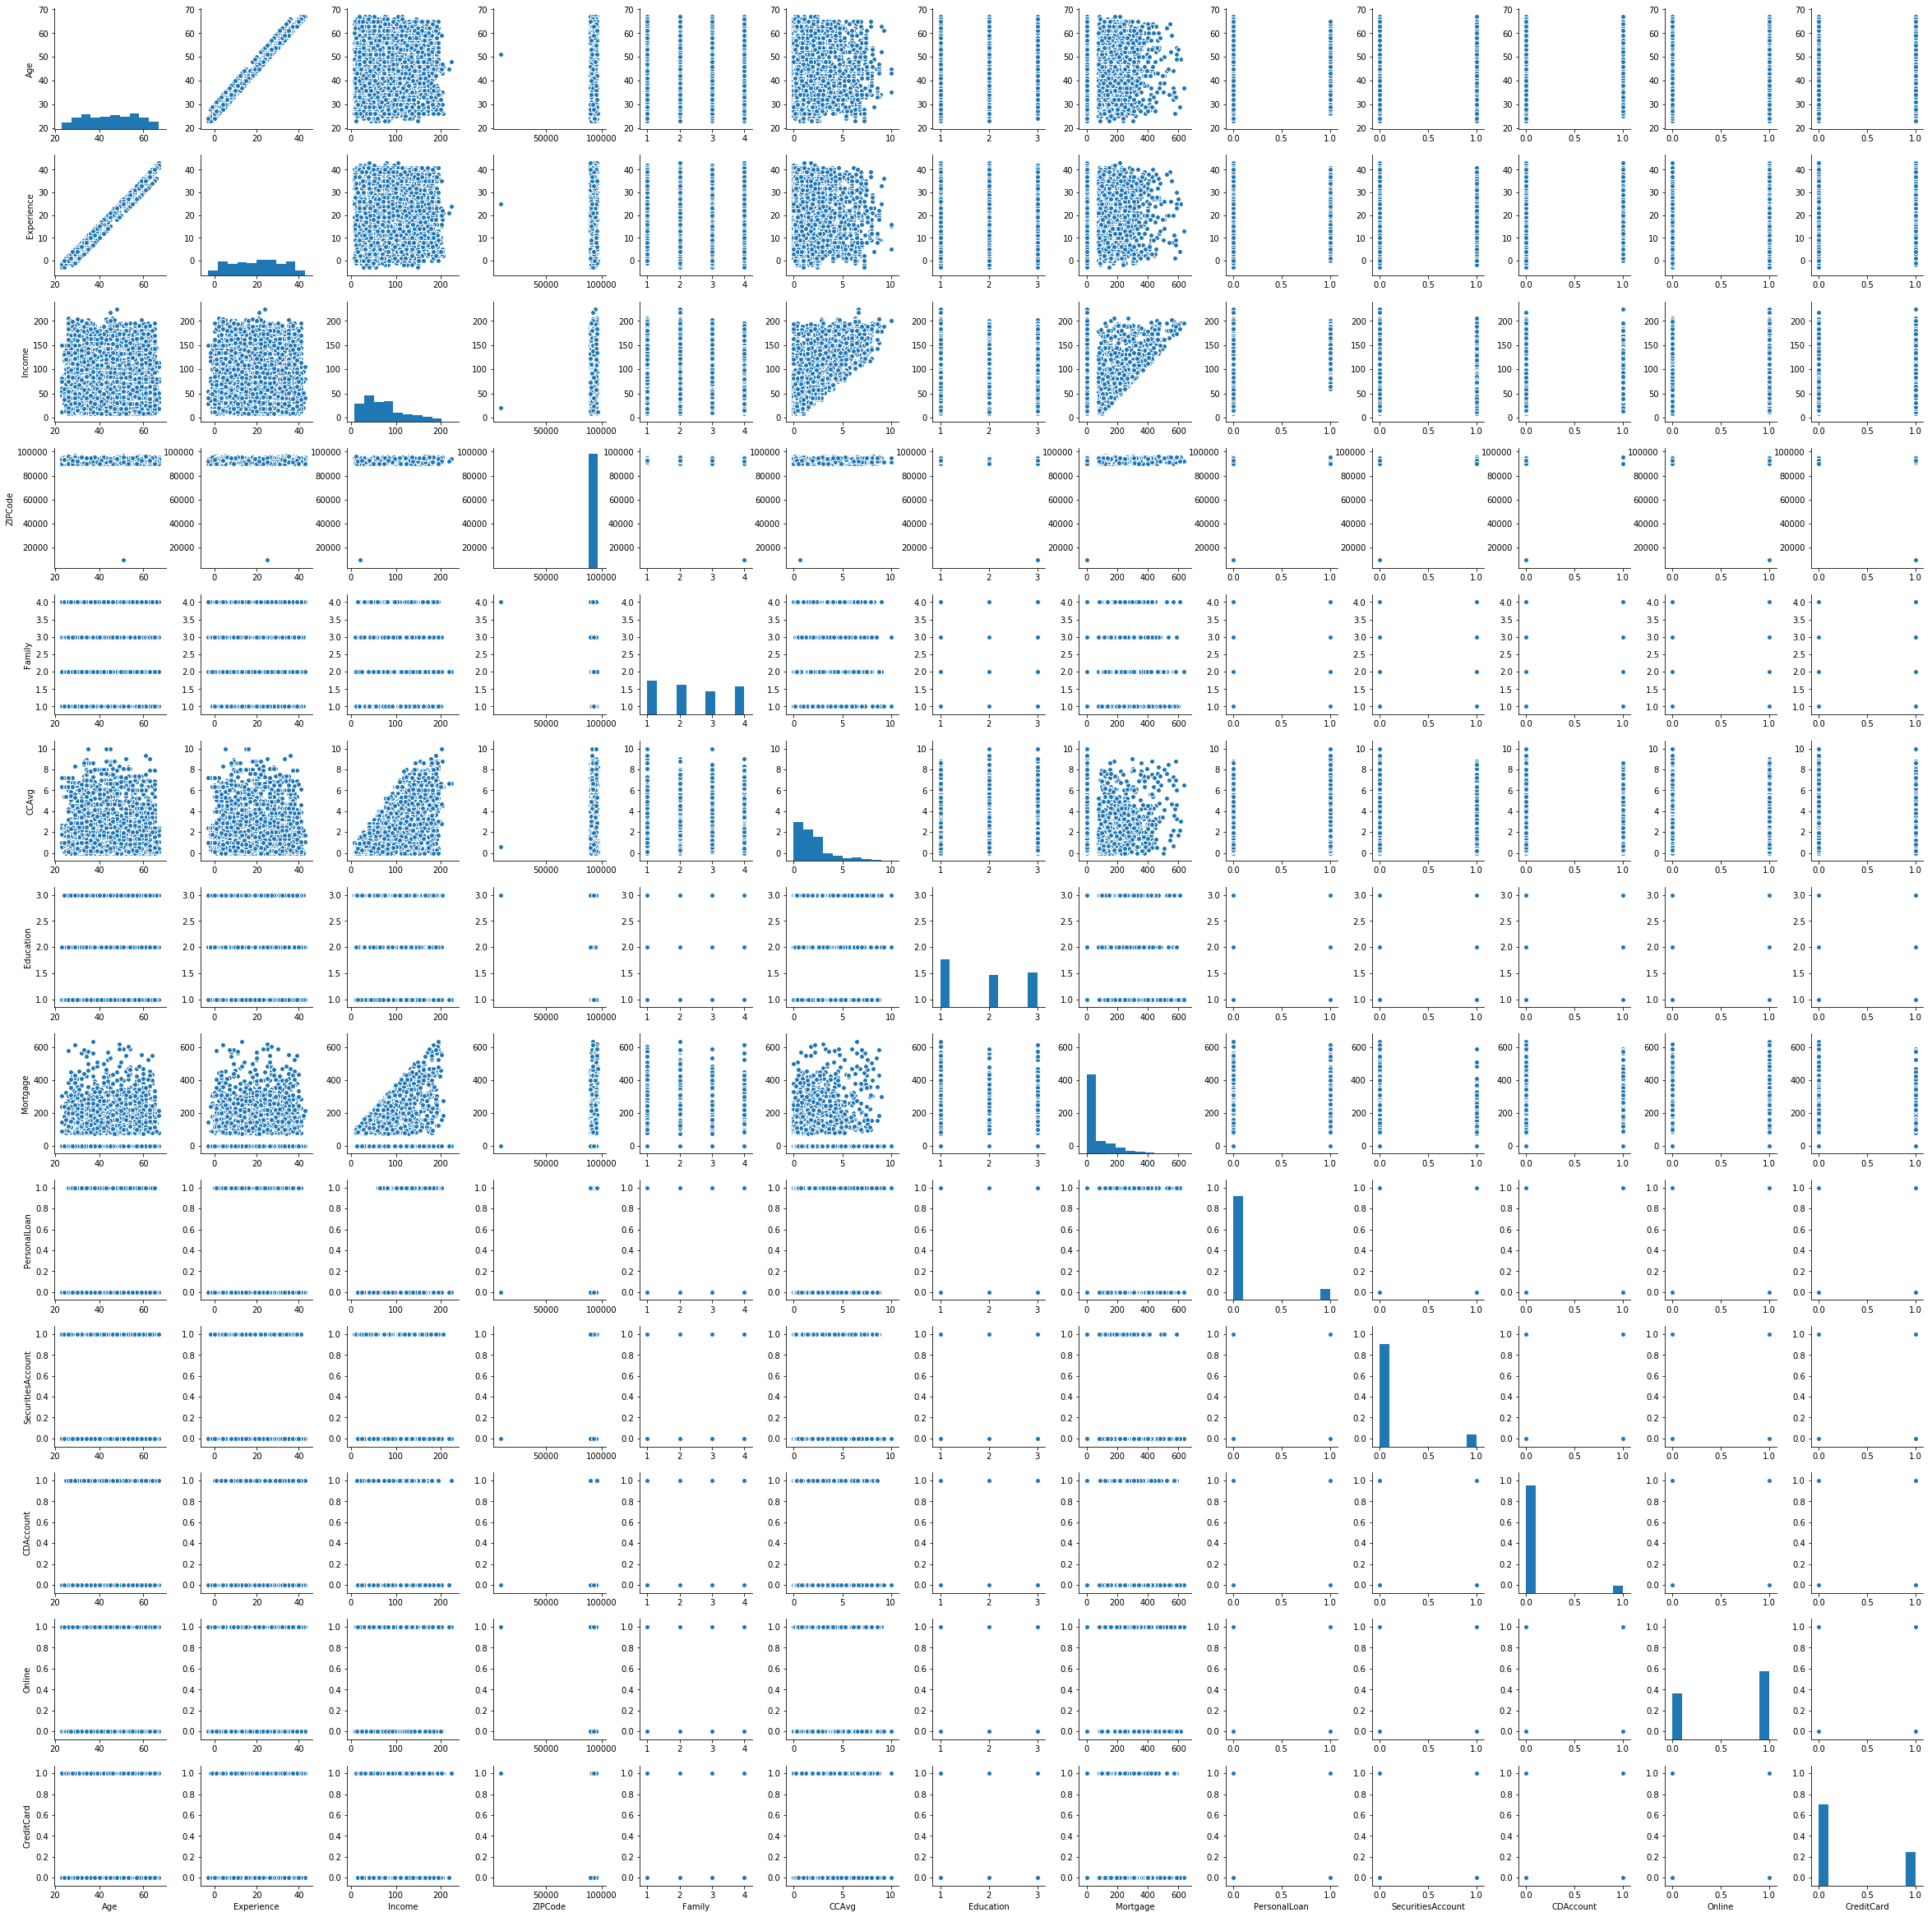

In [12]:
sns.pairplot(loandata.iloc[:,1:])

In [8]:
#there is a positive correlation between experience and age as per the diagram 
#there is no signifact relation between age and income

/Users/pankhuribansal/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


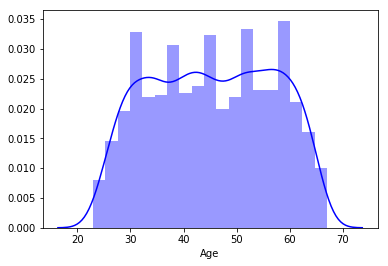

In [18]:
sns.distplot( loandata['Age'], color = 'b')

In [7]:
#Age is normally distributed with most of the data concentrated between 30 to 60 years of age 

/Users/pankhuribansal/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


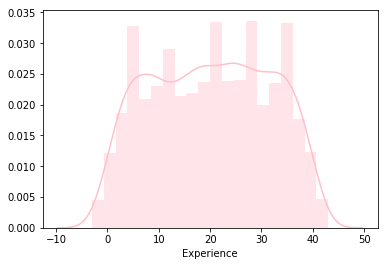

In [19]:
sns.distplot(loandata['Experience'], color='pink')

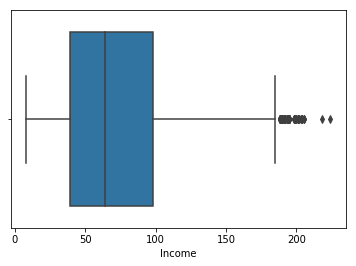

In [20]:
sns.boxplot(loandata['Income'])

/Users/pankhuribansal/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


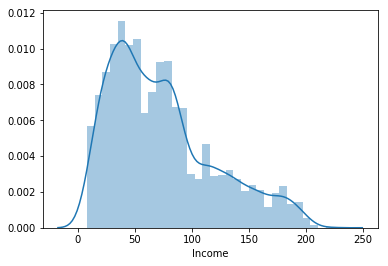

In [21]:
sns.distplot(loandata['Income'])

In [ ]:
#The above diagram indicates that most of the income is concentrated towards the left or between 45k to 100k 

In [25]:
#negative experience data cleansing
Exp = loandata.loc[loandata['Experience'] >0]
negExp = loandata.Experience < 0
column_name = 'Experience'
mylist = loandata.loc[negExp]['ID'].tolist()# getting the customer ID who has negative experience

In [17]:
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [23]:
loandata[loandata['Experience'] < 0]['Experience'].count()


52

In [24]:
#since there are 52 records with negatve experience, we need to clean the data. 

In [33]:
   for id in mylist:
    age = loandata.loc[np.where(loandata['ID']==id)]["Age"].tolist()[0]
    education = loandata.loc[np.where(loandata['ID']==id)]["Education"].tolist()[0]
    df_filtered = Exp[(Exp.Age == age) & (Exp.Education == education)]
    exp = df_filtered['Experience'].median()
    loandata.loc[loandata.loc[np.where(loandata['ID']==id)].index, 'Experience'] = exp

In [9]:
loandata[loandata['Experience'] < 0]['Experience'].count()

52

In [35]:
#the above 0 indicates that thre are no more negative counts for experience

In [38]:
loandata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [11]:
loandata.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [12]:
loandata.groupby(["Personal Loan"]).count() 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


In [ ]:
#the dataset for personal loans is skewed as there are far feewer datapoints in the group who took personal loan than who did not. 

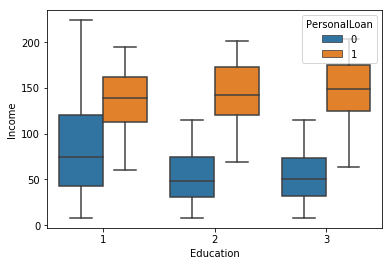

In [40]:
#now lets analyse the impact of Income and education on personal loan 

sns.boxplot(x='Education', y='Income', hue='PersonalLoan', data=loandata)

In [41]:
#the above diagram indicates that people with education level one have higher income but people who have taken loan all have higher income than different educational levels.
#personallaon is more dependant on higher income and is not dependant on the educational level. 

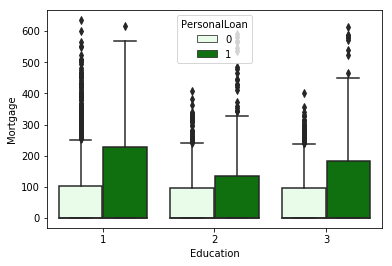

In [43]:
sns.boxplot(x="Education", y='Mortgage', hue="PersonalLoan", data=loandata,color='green')

In [44]:
#the above diagram indicates that people with personalloan have higher mortage than people without and is not dependant on educational level. 

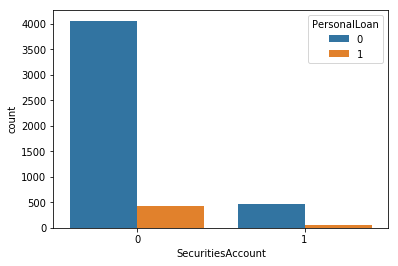

In [45]:
sns.countplot(x="SecuritiesAccount", data=loandata,hue="PersonalLoan")


In [46]:
#customers who donot have loans have more securitiesaccount 

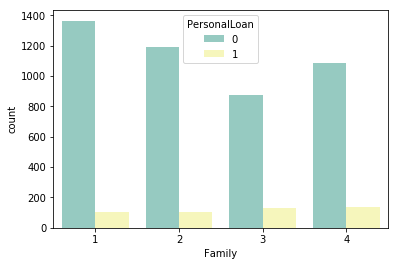

In [54]:
sns.countplot(x='Family',data=loandata,hue='PersonalLoan', palette='Set3')


In [55]:
#as per the graph above, size of the family has little or no impact on the loan. But it should be noted that with family size 3 and above, the likelihoo of loan increases. 

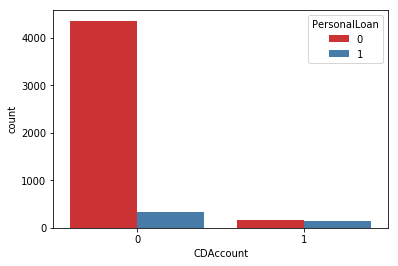

In [58]:
sns.countplot(x='CDAccount',data=loandata,hue='PersonalLoan', palette='Set1')


In [59]:
#Observation: Customers who do not have CD account, does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

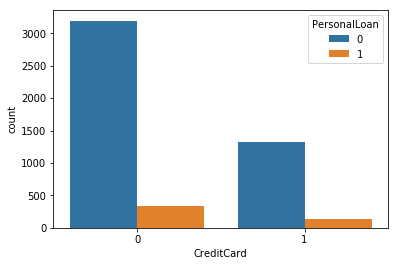

In [60]:
sns.countplot(x="CreditCard", data=loandata,hue="PersonalLoan")


/Users/pankhuribansal/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


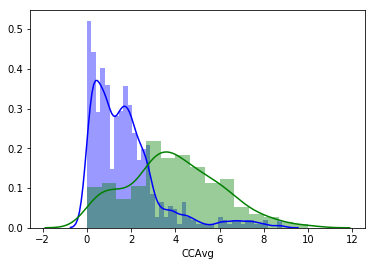

In [63]:
sns.distplot( loandata[loandata.PersonalLoan == 0]['CCAvg'], color = 'b')
sns.distplot( loandata[loandata.PersonalLoan == 1]['CCAvg'], color = 'g')

In [64]:
#people with a personalloan have a higher creditcard average as compared to those who donot.

In [66]:
print('Credit card spending of NonL customers: ',loandata[loandata.PersonalLoan == 0]['CCAvg'].median()*1000)
print('Credit card spending of L customers    : ', loandata[loandata.PersonalLoan == 1]['CCAvg'].median()*1000)

Credit card spending of NonL customers:  1400.0
Credit card spending of L customers    :  3800.0


/Users/pankhuribansal/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


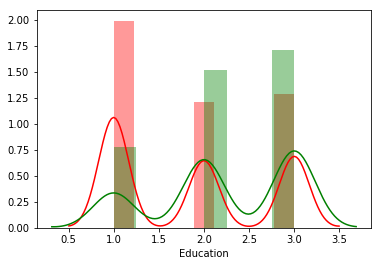

In [67]:
sns.distplot( loandata[loandata.PersonalLoan == 0]['Education'], color = 'r')
sns.distplot( loandata[loandata.PersonalLoan == 1]['Education'], color = 'g')

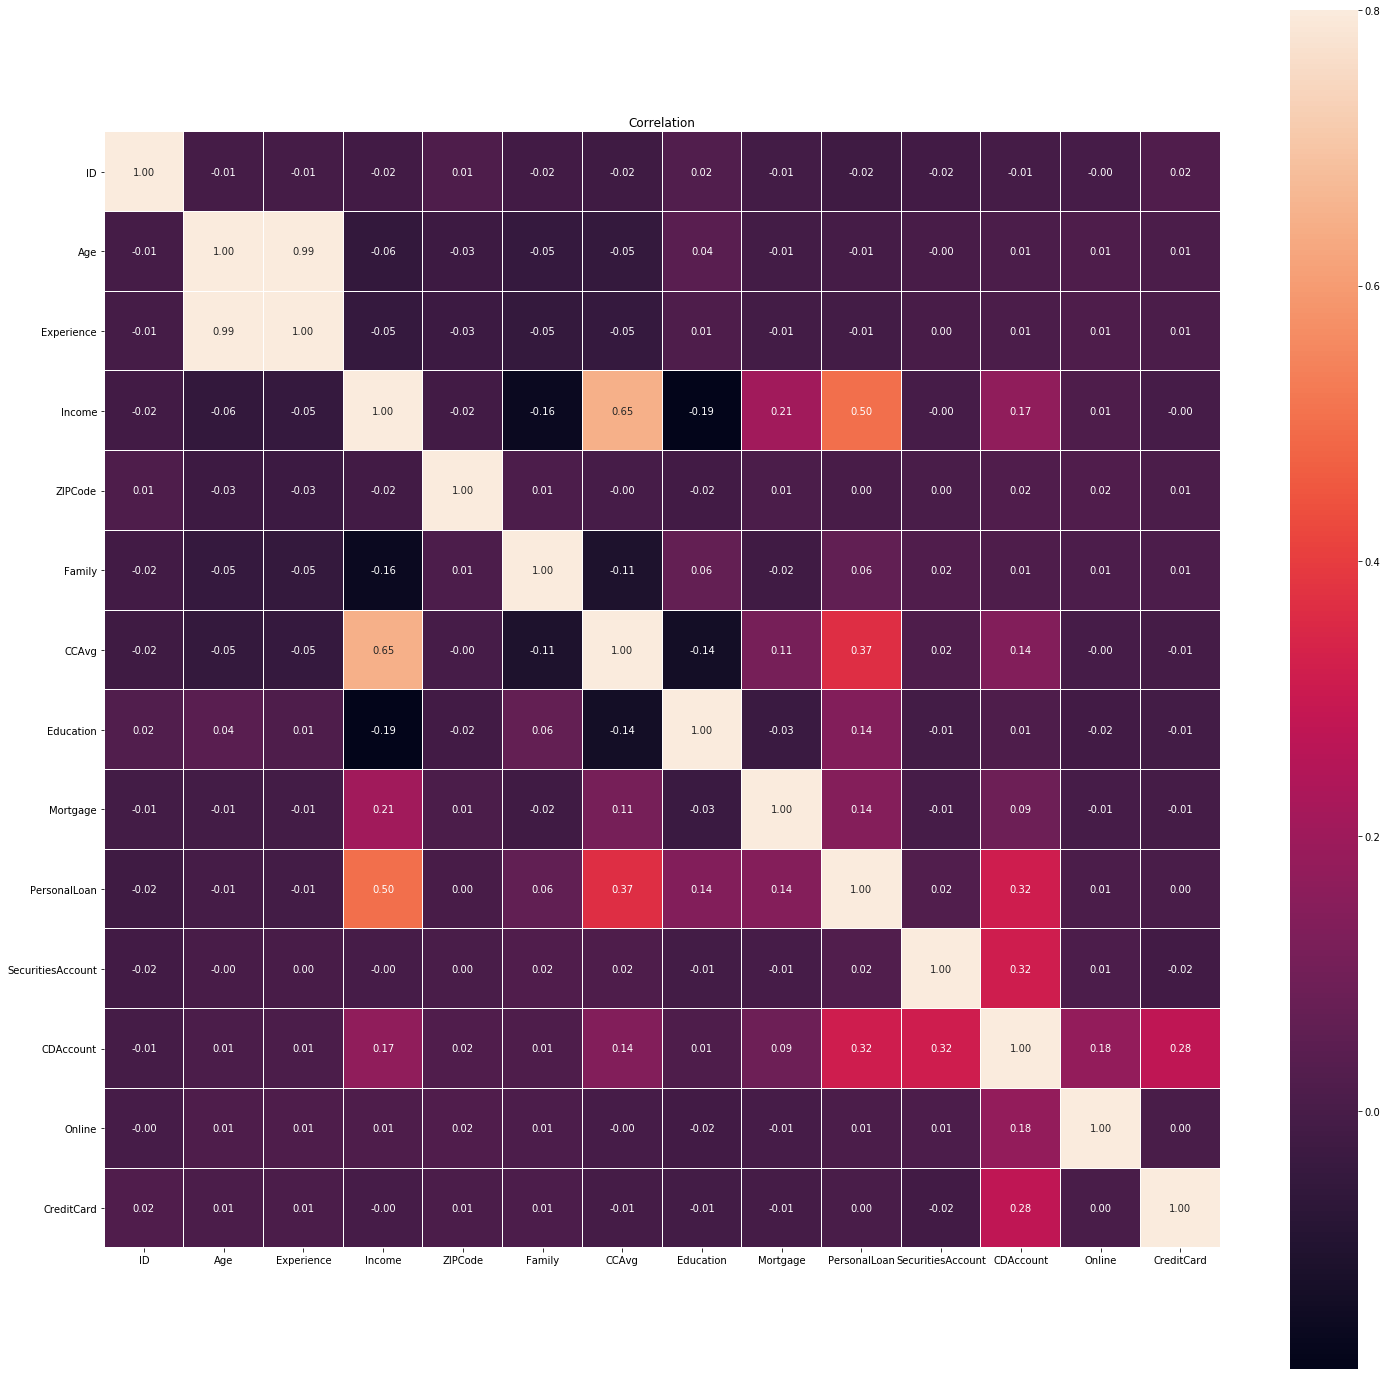

In [68]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25, 25))
df = sns.heatmap(loandata.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Correlation')
plt.show()

In [69]:
#income and CCavg have a moderate correlation & Age and experience are very highly correlated 

In [70]:
#splitting data into training and test

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

In [52]:
#X_train, X_test, y_train, y_test = model_selection.train_test_split(features_array, target_labels, test_size=test_size, random_state=seed)
y_train = np.ravel(y_train)  

In [70]:
X_ld = loandata.loc[:, loandata.columns != 'Personal Loan']
y_ld = loandata.loc[:, loandata.columns == 'Personal Loan']

features= X_ld.iloc[:, 0:10]
features_array = features.values   #need to convert into array
target_labels = y_ld.values


test_size = 0.30 # diving the set in the ratio of 70:30
train_set, test_set = train_test_split(loandata.drop(['ID','Experience','CCAvg'], axis=1), test_size=0.3 , random_state=50)


In [104]:
#logisticregression

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [72]:
model = LogisticRegression()
model.fit(X_train, y_train)
model_score = model.score(X_test, y_test)
y_predict = model.predict(X_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.9026666666666666
[[1311   39]
 [ 107   43]]


In [73]:
# the number above predicts an accuracy of +90% which is very high but one should not be confused and beleive this no.
#numbers need to be checked at the class level. 
print(metrics.classification_report(y_test, y_predict))

             precision    recall  f1-score   support

          0       0.92      0.97      0.95      1350
          1       0.52      0.29      0.37       150

avg / total       0.88      0.90      0.89      1500



In [ ]:
#the class level analysis indicate that the precision for class 1 is very low and hence is not a good measure. 

In [75]:
#knn
NNH = KNeighborsClassifier(n_neighbors= 50 , weights = 'distance' )

In [77]:
knn = KNeighborsClassifier(n_neighbors= 50 , weights = 'distance', metric='euclidean')
knn.fit(X_train, y_train)    
predicted = knn.predict(X_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, predicted)
print(acc)

0.9


In [78]:
print(metrics.confusion_matrix(y_test,predictions))

[[1192  158]
 [ 135   15]]


In [79]:
expected = y_test
predicted = model.predict(X_test)
# lets summarise the model fit
print(metrics.classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       0.92      0.97      0.95      1350
          1       0.52      0.29      0.37       150

avg / total       0.88      0.90      0.89      1500



In [46]:
#naive model 
naive_model = GaussianNB()
naive_model.fit(X_train, y_train)

prediction = naive_model.predict(X_test)
naive_model.score(X_test,y_test)

0.902

In [47]:
#Assess the accuracy of the model on test data
print(metrics.confusion_matrix(y_test,prediction))

[[1271   91]
 [  56   82]]


In [48]:
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       0.96      0.93      0.95      1362
          1       0.47      0.59      0.53       138

avg / total       0.91      0.90      0.91      1500



In [82]:
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
cm = pd.DataFrame(confusion_matrix(y_test, prediction).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,1192,135
Yes,158,15
